In [1]:
!nvidia-smi

Mon Oct  5 06:58:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 53kB/s 


In [3]:
import tensorflow as tf
tf.__version__

'2.3.1'

In [6]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model

In [8]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [9]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [12]:
#resizing the imag to 224 as resnet50 needs this image size
IMAGE_SIZE = [224,224]
train_path='/content/drive/My Drive/Datasets/potato leaf/train-20201004T150233Z-001/train'
valid_path='/content/drive/My Drive/Datasets/potato leaf/test-20201004T144451Z-001/test'

In [13]:
#importing the resnet50 library
#weights that i have used are imagenet weights
#include_top = false , because i dont  want the  bottom layer , this  layer will be mine
resnet=ResNet50(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False )

94773248/94765736 [==============================] - 3s 0us/step


In [14]:
#dont train existing weights
for layer in resnet.layers:
  layer.trainable = False

In [16]:
#getting number no. of output classes
folders=glob('/content/drive/My Drive/Datasets/potato leaf/train-20201004T150233Z-001/train/*')  

In [17]:
len(folders)

4

In [18]:
#for output layer
x=Flatten()(resnet.output) 

In [19]:
#softmax for multi class output
prediction=Dense(len(folders),activation='softmax')(x)
# 
model=Model(inputs=resnet.input,outputs=prediction) 

In [20]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [21]:
#compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [22]:
#image data generator to  import images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#with data augmetation 
#we shold not do zoom and horizontal flip for test data

In [23]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Datasets/potato leaf/train-20201004T150233Z-001/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [26]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Datasets/potato leaf/test-20201004T144451Z-001/test', 
                                            target_size = (224, 224), 
                                            batch_size = 32, 
                                            class_mode = 'categorical') 

Found 18 images belonging to 4 classes.


In [27]:
# fit the model
# steps_per_epoches=61 as (total images)(1951)/(batch size)(32)
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 1687s 28s/step - loss: 2.5403 - accuracy: 0.4003 - val_loss: 0.9874 - val_accuracy: 0.6667
Epoch 2/20
61/61 [==============================] - 37s 606ms/step - loss: 1.1636 - accuracy: 0.5515 - val_loss: 2.3791 - val_accuracy: 0.3333
Epoch 3/20
61/61 [==============================] - 36s 596ms/step - loss: 1.1072 - accuracy: 0.5638 - val_loss: 0.7490 - val_accuracy: 0.7222
Epoch 4/20
61/61 [==============================] - 36s 598ms/step - loss: 0.9224 - accuracy: 0.6376 - val_loss: 0.8311 - val_accuracy: 0.7222
Epoch 5/20
61/61 [==============================] - 37s 600ms/step - loss: 0.8189 - accuracy: 0.6679 - val_loss: 0.6813 - val_accuracy: 0.7222
Epoch 6/20
61/61 [==============================] - 37s 602ms/step - loss: 0.8767 - accuracy: 0.6689 - val_loss: 1.3310 - val_accuracy: 0.6667
Epoch 7/20
61/61 [==============================] - 36s 597ms/step

In [28]:
import matplotlib.pyplot as plt

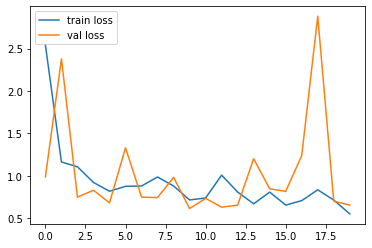

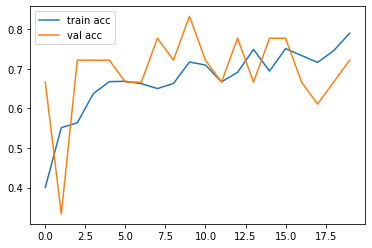

<Figure size 432x288 with 0 Axes>

In [29]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [31]:
y_pred = model.predict(test_set) 

In [32]:
y_pred

array([[1.4405573e-03, 4.3559662e-01, 1.6374989e-01, 3.9921293e-01],
       [7.2814524e-04, 2.2056751e-01, 3.4967672e-02, 7.4373657e-01],
       [4.7432510e-03, 2.7028540e-01, 2.1155968e-01, 5.1341170e-01],
       [9.3316700e-04, 9.2479539e-01, 6.3306138e-02, 1.0965299e-02],
       [6.1019929e-03, 4.3479659e-02, 1.9515301e-01, 7.5526536e-01],
       [8.4544957e-04, 9.7360694e-01, 2.5627209e-04, 2.5291353e-02],
       [1.2098200e-04, 7.8350070e-07, 9.9987805e-01, 1.3513962e-07],
       [3.2553419e-06, 4.3050025e-07, 9.9998820e-01, 8.0986711e-06],
       [5.3651709e-02, 8.1369114e-01, 6.6734694e-02, 6.5922499e-02],
       [1.3545324e-03, 2.9074270e-04, 9.9826509e-01, 8.9622590e-05],
       [4.1480991e-01, 4.9794921e-01, 4.7861982e-02, 3.9378881e-02],
       [9.9701047e-01, 5.5091488e-07, 2.8959478e-03, 9.2999137e-05],
       [1.3869638e-03, 1.3065184e-03, 9.9651343e-01, 7.9303212e-04],
       [1.4731269e-04, 1.4821639e-04, 9.9951291e-01, 1.9163494e-04],
       [2.9013213e-02, 2.5269779e-

In [33]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [34]:
y_pred

array([1, 3, 3, 1, 3, 1, 2, 2, 1, 2, 1, 0, 2, 2, 3, 1, 1, 2])